## Задание 2

- решите задачу классификации на ваших данных с использованием рассмотренных моделей sklearn: knn, NB, Logistic Regression, SVM. Не забудьте подобрать гиперпараметры.
- вычислите значения метрик Accuracy, Precision, Recall, F1, ROC AUC score


# Импорт

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics.pairwise import distance_metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve

from joblib import dump


# Загружаем датасет и разбиваем её на выборку.

In [2]:
models = pd.read_csv('../../Data/neo_task_moded_norm.csv')
X_train, X_test, y_train, y_test = train_test_split(models.drop('hazardous', axis=1), models['hazardous'], test_size=0.25, random_state=42)


# Подбираем гиппер-параметры.

In [3]:
knn_optimal_n_neighbors = RandomizedSearchCV(KNeighborsClassifier(), 
                                             {'n_neighbors': np.arange(1, 3, 1), 
                                              'weights': ['uniform', 'distance'],
                                              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                                              'leaf_size': np.arange(1, 6, 1),
                                              'p': np.arange(1, 3, 1),
                                              'metric': list(distance_metrics().keys())
                                              },
                                              n_iter=8,
                                              n_jobs=-1,
                                              scoring='accuracy',
                                              random_state=71
                                              ).fit(X_train, y_train)
knn_optimal_n_neighbors.best_params_

c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.88624351 0.88624351 0.88669528 0.9049168  0.88624351
 0.88669528 0.88624351]
  warnings.warn(


{'weights': 'uniform',
 'p': 2,
 'n_neighbors': 2,
 'metric': 'nan_euclidean',
 'leaf_size': 3,
 'algorithm': 'brute'}

In [10]:
# knn_optimal_n_neighbors = GridSearchCV(KNeighborsClassifier(), 
#                                        {'n_neighbors': np.arange(1, 3, 1), 
#                                         # 'weights': ['uniform', 'distance'],
#                                         'algorithm': ['ball_tree', 'kd_tree', 'brute'],
#                                         'leaf_size': np.arange(1, 3, 1),
#                                         'p': np.arange(1, 3, 1),
#                                         # 'metric': np.array(distance_metrics().keys())
#                                         },
#                                         cv=2,
#                                         n_jobs=-1,
#                                         scoring='accuracy'
#                                         ).fit(X_train, y_train)
# knn_optimal_n_neighbors.best_params_

# Метод k-ближайших соседей

In [4]:
knn = KNeighborsClassifier(
    n_neighbors=knn_optimal_n_neighbors.best_params_['n_neighbors'] if 'n_neighbors' in knn_optimal_n_neighbors.best_params_ else 5,
    algorithm=knn_optimal_n_neighbors.best_params_['algorithm'] if 'algorithm' in knn_optimal_n_neighbors.best_params_ else 'auto',
    p=knn_optimal_n_neighbors.best_params_['p'] if 'p' in knn_optimal_n_neighbors.best_params_ else 2,
    weights=knn_optimal_n_neighbors.best_params_['weights'] if 'weights' in knn_optimal_n_neighbors.best_params_ else 'uniform',
    leaf_size=knn_optimal_n_neighbors.best_params_['leaf_size'] if 'leaf_size' in knn_optimal_n_neighbors.best_params_ else 30,
    metric=knn_optimal_n_neighbors.best_params_['metric'] if 'n_neighbors' in knn_optimal_n_neighbors.best_params_ else 'minkowski',
    )
knn.fit(X_train, y_train)
y_predicted_by_kn_neighbors = knn.predict(X_test)

## Оценка качества 

In [5]:
print('Accuracy')
print(accuracy_score(y_test, y_predicted_by_kn_neighbors))

Accuracy
0.9044951434379941


In [6]:
print('Confusion matrix')
print(confusion_matrix(y_test, y_predicted_by_kn_neighbors))

Confusion matrix
[[19564   385]
 [ 1729   457]]


In [7]:
print('Precision, Recall, F\n', classification_report(y_test, y_predicted_by_kn_neighbors))

Precision, Recall, F
               precision    recall  f1-score   support

       False       0.92      0.98      0.95     19949
        True       0.54      0.21      0.30      2186

    accuracy                           0.90     22135
   macro avg       0.73      0.59      0.63     22135
weighted avg       0.88      0.90      0.88     22135



ROC AUC score


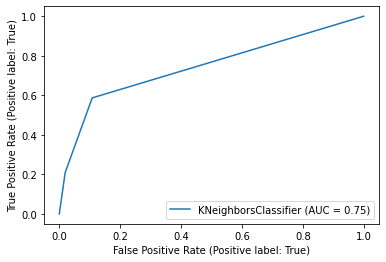

In [8]:
print('ROC AUC score') 
plot_roc_curve(knn, X_test, y_test)

In [ ]:
dump(gaussian_naive_bayes, '../../Pipelines/knn.sav')